In [1]:
from simulation_code.seir import SEIRModel
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Daten werden eingelesen
D = 5 # Anzahl Landkreise
N = [250000, 42000, 42000, 550000, 130000] # Einwohner pro Landkreis
t = np.linspace(0, 365, 365)
alpha, beta, gamma = 0.3, 0.2, 0.1 # Raten (für alle Landkreise gleich)

I0 = [1000, 300, 300, 2500, 1000] # Infektiöse pro Landkreis
E0, R0 = np.zeros(D), np.ones(D) * beta / gamma # Weitere Personen pro Landkreis
S0 = N - E0 - I0 - R0 # Anfällige pro Landkreis

In [2]:
model = SEIRModel(D, N, S0, E0, I0, R0, alpha, beta, gamma)
# Berechnung der Werte über Funktion im Model
S, E, I, R = model.simulate(t)

# Berechnung der Werte im Simulator
#sol = solve_ivp(fun=model.ode_system, t_span=[t[0], t[-1]], t_eval=t, y0=np.array([S0, E0, I0, R0]).ravel())

#S, E, I, R = [np.array([sol.y[:, i].reshape((4, D))[j] for i in range(len(t))]) for j in range(4)]

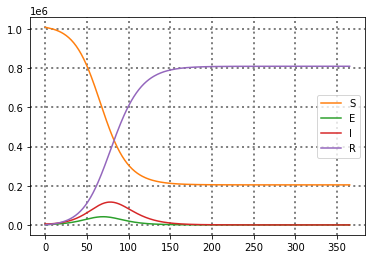

In [3]:
# Plot für Werte aller Landkreise
fig, ax = plt.subplots()
ax.grid(linestyle=':', linewidth=2.0, color='#808080')
colors = list(matplotlib.colors.TABLEAU_COLORS.values())
ax.plot(t, np.sum(S, axis=1), colors[1], label='S')
ax.plot(t, np.sum(E, axis=1), colors[2], label='E')
ax.plot(t, np.sum(I, axis=1), colors[3], label='I')
ax.plot(t, np.sum(R, axis=1), colors[4], label='R')
ax.legend(loc='best')
plt.show()